In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import pandas as pd
import numpy as np
import sklearn
from bokeh.io import output_notebook, show

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None) # default='warn'
sklearn.set_config(display = 'diagram')
output_notebook()

Loading BokehJS ...

In [4]:
df_origin = pd.read_csv("/media/sf_iphone/superstore_data.csv")
df_origin

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0


In [5]:
from datetime import date

def feature_map(df: pd.DataFrame) -> pd.DataFrame:
    df['Age'] = date.today().year - df['Year_Birth']
    df['Yrs_Clnt'] = (date.today() - pd.to_datetime(df['Dt_Customer']).dt.date).dt.days / 365
    return df.drop(columns = ['Id', 'Year_Birth', 'Dt_Customer'])

df = feature_map(df_origin)
df
    

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Yrs_Clnt
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,53,9.279452
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,62,9.282192
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,65,9.372603
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56,8.890411
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,34,9.145205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476.0,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,0,47,10.232877
2236,2n Cycle,Married,31056.0,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,0,46,10.676712
2237,Graduation,Divorced,46310.0,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0,0,47,11.542466
2238,Graduation,Married,65819.0,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0,0,45,10.824658


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['Response']), df['Response'], 
    test_size=0.3, stratify = df['Response'], random_state=42
)
# in case index is not matching error
X_train.reset_index(drop = True, inplace=True)
X_test.reset_index(drop = True, inplace=True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [7]:
from luntaiDs.ModelingTools.Explore.plots import chart_donut


y_plot = chart_donut(
    donut_arr=y_train.value_counts(dropna = False),
    title = 'Target Distribution'
)
show(y_plot)

(CVXPY) Sep 24 02:47:38 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Sep 24 02:47:38 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [8]:
X_train.dtypes

Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Age                      int64
Yrs_Clnt               float64
dtype: object

In [17]:
X_train['Education'].value_counts()

Graduation    789
PhD           334
Master        272
2n Cycle      135
Basic          38
Name: Education, dtype: int64

In [18]:
from luntaiDs.ModelingTools.Explore.profiling import BinaryStat, OrdinalCategStat, NominalCategStat, NumericStat, TabularStat

nominal_cols = [
    'Marital_Status'
]
num_cols = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Yrs_Clnt'
]

schemas = {
    'Complain' : BinaryStat(int_dtype = True, pos_values = [1], na_to_pos = False),
    'Education' : OrdinalCategStat(categories = ['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']),
}
for col in nominal_cols:
    schemas[col] = NominalCategStat()
for col in num_cols:
    schemas[col] = NumericStat(setaside_zero=False, log_scale=True, xtreme_method='iqr')

In [19]:
ts = TabularStat(configs = schemas, n_jobs = 1)
ts.fit(X_train)

/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/luntaixia/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/luntaixia/miniconda3/lib/python3.9/site-package

In [22]:
# generate fake sample data
ts.generate(size = 100, ignore_na=False)

,Complain,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Yrs_Clnt
0,0,Graduation,Married,70485.842268,0.998989,0.001999,8.026419,490.736212,12.378115,31.524336,15.094999,0.005601,47.273253,0.968947,3.911103,0.007287,4.94943,4.993677,62.841283,11.225127
1,0,Graduation,Together,33413.669441,0.005023,1.007561,6.913575,181.584596,1.924352,8.023156,0.01596,2.015358,3.96225,0.961374,8.899949,9.050707,8.9187,7.838807,52.03332,8.98486
2,0,Graduation,Single,65660.022566,0.009427,0.998987,26.207855,650.143055,0.042504,296.644843,1.997361,140.094382,4.877506,0.960867,4.966615,0.001504,10.044927,6.999012,58.899697,9.283202
3,0,Graduation,Married,18699.704076,0.008887,1.019883,56.630382,65.309077,55.490203,469.684914,0.033787,0.042304,14.93496,0.99553,6.90731,5.151646,11.18219,3.027789,44.220714,10.7944
4,0,PhD,Married,49566.095156,1.019542,1.019894,40.911979,5.904384,5.883891,1.943858,7.189265,0.020664,24.231503,1.000366,3.929906,1.000463,12.942069,1.990958,44.328963,10.040538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,Graduation,Single,24109.756981,1.008117,1.01919,96.460633,26.577084,4.808581,31.300038,0.051411,0.033438,24.627799,1.976301,3.981739,0.009152,4.055556,7.87522,37.124968,10.010391
96,0,Graduation,Together,22166.549334,1.015427,1.016543,91.566615,8.97467,0.037699,182.853912,36.160936,36.952247,37.368888,0.958362,0.994771,0.021959,7.057906,6.879146,45.173907,9.665415
97,0,2n Cycle,Together,64786.19171,0.006788,1.002378,64.356504,243.901668,100.385191,16.062191,53.525651,5.928311,2.044219,4.003841,1.979951,0.964326,5.99751,2.966783,57.0118,10.740847
98,0,Master,Married,24798.627245,0.002404,1.003516,65.523952,108.618045,110.218828,115.78825,29.624492,10.073333,10.248761,0.970351,4.941035,1.018548,4.000471,8.900824,66.132744,11.029616


In [89]:
from luntaiDs.ModelingTools.Explore.profiling import CategUniVarClfTargetCorr, NumericUniVarClfTargetCorr, TabularUniVarClfTargetCorr
from luntaiDs.ModelingTools.Explore.plots import plot_uni_clf_target_corr, plot_categ_clf_target_corr, plot_numeric_clf_target_corr

tuvct = TabularUniVarClfTargetCorr(configs = {
    col : CategUniVarClfTargetCorr() if col in ts.get_categ_cols() else NumericUniVarClfTargetCorr()
    for col in ts.configs.keys()   
})
tuvct.fit(X_train, y_train)

# output to html:
fig = plot_uni_clf_target_corr(
    tuvct=tuvct, 
    html_path="/media/sf_iphone/univariate_feature_target_correlation_supermarket_campaign.html"
)

invalid value encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
invalid value encountered in log10
divide b

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from luntaiDs.ModelingTools.FeatureEngineer.preprocessing import get_preliminary_preprocess, floatFy
from luntaiDs.ModelingTools.CustomModel.linear import LinearClfStatsModelWrapper

ftarget_preprocess_pipe = get_preliminary_preprocess(ts)
lm = LinearClfStatsModelWrapper(
    model_family='glm',
    fit_intercept=True,
)

lm_pipe = Pipeline([
    ('preprocess', ftarget_preprocess_pipe),
    ('float', FunctionTransformer(floatFy)),
    ('glm', lm)
])
lm_pipe.fit(X_train, y_train)
print(lm_pipe['glm'].model_result_.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1568
Model:                            GLM   Df Residuals:                     1549
Model Family:                Gaussian   Df Model:                           18
Link Function:               Identity   Scale:                         0.10416
Method:                          IRLS   Log-Likelihood:                -442.07
Date:                Fri, 22 Sep 2023   Deviance:                       161.34
Time:                        18:24:02   Pearson chi2:                     161.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2064
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1471    

: 

In [26]:
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer

num_cols = ts.get_numeric_cols()
fs, ps = f_classif(
    X = SimpleImputer(
        strategy='median'
    ).fit_transform(X_train[num_cols]),
    y = y_train
)
pd.DataFrame({
    'Fvalue' : fs, 
    'Pvalue': ps,
}, index = num_cols).sort_values(
    by = 'Fvalue', 
    ascending=False
)

,Fvalue,Pvalue
NumCatalogPurchases,84.160857,1.394896e-19
MntMeatProducts,83.969182,1.529332e-19
MntWines,81.966834,4.002090e-19
Recency,49.940834,2.376760e-12
Yrs_Clnt,49.864191,2.468455e-12
Income,40.201400,2.989581e-10
MntGoldProds,38.400459,7.351279e-10
Teenhome,35.677401,2.876362e-09
NumWebPurchases,31.602092,2.236591e-08
MntFishProducts,24.841476,6.915094e-07


In [27]:
from sklearn.feature_selection import mutual_info_classif
from luntaiDs.ModelingTools.Explore.plots import chart_barchart
from luntaiDs.ModelingTools.FeatureEngineer.preprocessing import get_mutual_info_preprocess

ftarget_preprocess_pipe = get_mutual_info_preprocess(ts)  # all discrete features will be ordinal encoded
X_processed = ftarget_preprocess_pipe.fit_transform(X_train, y_train)

mi = mutual_info_classif(
    X_processed, 
    y_train, 
    discrete_features = X_processed.columns.isin(ts.get_categ_cols()),
    n_neighbors = 3
)
mi = pd.Series(
    mi, 
    index = X_processed.columns
).sort_values(ascending = False)

mi_chart = chart_barchart(
    mi,
    max_bar=50,
    size = (750, 750),
    title="Mutual Info Score by Feature"
)
show(mi_chart)

In [28]:
from luntaiDs.ModelingTools.Explore.plots import chart_gridplot

grid = X_train.corr()
grid.index.name = 'Feature'
grid.columns.name = 'Features'

fig = chart_gridplot(
    grid,
    size = (700, 600),
    title = 'Correlation Coefficients between Numerical Variables'    
)
show(fig)

In [31]:
from luntaiDs.ModelingTools.FeatureEngineer.feature_selection import chi2_score_cross

categ_cols = ts.get_categ_cols()
X_categ = X_train[categ_cols]

chi_test_output = chi2_score_cross(X_categ)
chi_test_output

,var1,var2,chi2,pvalue
0,Complain,Complain,1481.115416,0.000000
1,Complain,Education,7.129100,0.129221
2,Complain,Marital_Status,0.880311,0.996535
3,Education,Complain,7.129100,0.129221
4,Education,Education,6272.000000,0.000000
5,Education,Marital_Status,38.642155,0.086853
6,Marital_Status,Complain,0.880311,0.996535
7,Marital_Status,Education,38.642155,0.086853
8,Marital_Status,Marital_Status,10976.000000,0.000000


In [33]:
grid = chi_test_output.pivot(
    index='var1', 
    columns='var2', 
    values='pvalue'
)
grid.index.name = 'Feature'
grid.columns.name = 'Features'

fig = chart_gridplot(
    grid,
    reverse_color=True,
    size = (500, 400),
    title = 'P value (Chi2 test) between Categorical Variables'    
)
show(fig)

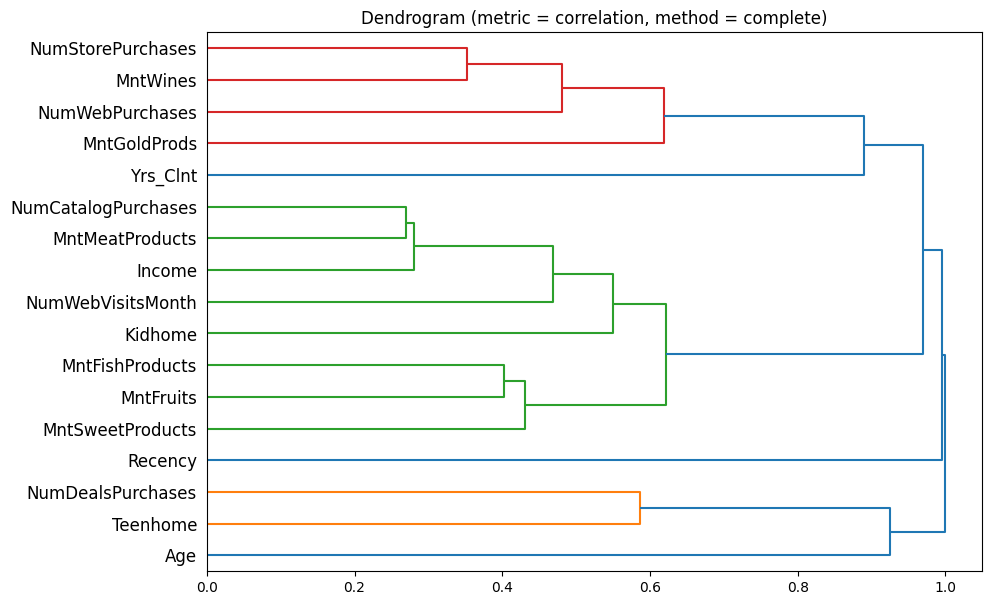

In [37]:
from scipy.spatial.distance import squareform, pdist
from luntaiDs.ModelingTools.FeatureEngineer.transformers import plot_feature_dendrogram

numeric_cols = ts.get_numeric_cols()

def distance_1_corr(m):
    # penalize for correlation > 1, make sure this distance is always < 1
    return 1 - np.abs(1 - pdist(m, metric = 'correlation'))

plot_feature_dendrogram(
    X_train[numeric_cols].dropna(),
    distance_func = distance_1_corr, 
    metric = 'correlation',
    method = 'complete'
)

In [38]:
from functools import partial
from sklearn.cluster import AgglomerativeClustering
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectPercentile
from category_encoders.ordinal import OrdinalEncoder
from luntaiDs.ModelingTools.FeatureEngineer.transformers import MyImputer, MyFeatureSelector, SelectKBestByCluster, SelectThreshold, NamedTransformer
from luntaiDs.ModelingTools.utils.support import make_present_col_selector
from luntaiDs.ModelingTools.FeatureEngineer.preprocessing import get_mutual_info_preprocess

# use MyFeatureSelector as it support pre-processing on features
num_selector = MyFeatureSelector(
    # selector criteria
    selector = SelectKBestByCluster(
        k = 2,  # select top 2 within each cluster
        # score is defined using Anova-F
        scorer = SelectThreshold(
            score_func = f_classif, # use Anova-F as score metric
            threshold = 0.05,  # 95% significant level
            use_p = True, # use p-value instead of F score to filter
        ),
        # cluster is defined using agglomerative clustering
        cluster_kernal = AgglomerativeClustering(
            n_clusters = None, # as we will set distance threshold
            affinity = 'precomputed', # use precomputed scores
            linkage = 'complete', # complete linkage
            distance_threshold = 0.5, # based on dendrogram above 
            compute_full_tree = True
        ),
        distance_func = distance_1_corr # defined above
        
    )
)

# categorical
categ_selector = MyFeatureSelector(
    selector = SelectPercentile(
        # use mutual info for categ features as filtering metric
        score_func = partial(
            mutual_info_classif,
            discrete_features = True,
        ),
        percentile = 75  # keep top 50% of features
    ),
)

num_cols = ts.get_numeric_cols()
categ_cols = ts.get_categ_cols()
# use NamedTransformer wrapper to keep column name
fsel = NamedTransformer(
    ColumnTransformer(
        transformers = [
            ('numeric', num_selector, make_present_col_selector(num_cols)),
            ('categorical', categ_selector, make_present_col_selector(categ_cols))
        ],
        remainder = 'drop'
    )
)
feature_selector_filter = Pipeline([
    ('preprocessing', get_mutual_info_preprocess(ts)),
    ('fsel', fsel)
])
feature_selector_filter.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 NamedTransformer(transformer=ColumnTransformer(transformers=[('Complain',
                                                                               Pipeline(steps=[('int_stringfy',
                                                                                                FunctionTransformer(func=<function intStringfy at 0x7fed07f4ce50>)),
                                                                                               ('binarize',
                                                                                                BinaryConverter(pos_values=['1'])),
                                                                                               ('impute',
                                                                                                MyImputer(fill_value=0,
                                                                                                          strategy='constant'))]),
                                                                               functools.partial(<function _select_present_...
                                                                               functools.partial(<function _select_present_subset at 0x7fed07994160>, ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Yrs_Clnt'])),
                                                                              ('categorical',
                                                                               MyFeatureSelector(selector=SelectPercentile(percentile=75,
                                                                                                                           score_func=functools.partial(<function mutual_info_classif at 0x7fed07f75700>, discrete_features=True))),
                                                                               functools.partial(<function _select_present_subset at 0x7fed07994160>, ['Complain', 'Education', 'Marital_Status']))])))])

In [39]:
feature_selector_filter.get_feature_names_out()

array(['NumWebPurchases', 'MntGoldProds', 'Income', 'MntWines',
       'MntFishProducts', 'MntFruits', 'Recency', 'Yrs_Clnt', 'Teenhome',
       'Kidhome', 'Education', 'Marital_Status'], dtype='<U15')

In [41]:
cluster_selector_ = feature_selector_filter['fsel'].transformer.named_transformers_['numeric'].selector_
cluster_selector_.feature_score_cluster_

,Scores,Cluster
Income,1.529422e-06,1
Kidhome,9.365641e-04,6
Teenhome,6.653540e-10,5
Recency,1.063764e-12,3
MntWines,5.209900e-10,1
MntFruits,7.628477e-08,2
MntMeatProducts,1.131763e-16,1
MntFishProducts,2.084233e-06,2
MntSweetProducts,1.977985e-08,2
MntGoldProds,2.041441e-14,0


In [42]:
categ_selector_ = feature_selector_filter['fsel'].transformer.named_transformers_['categorical'].selector_
#pd.Series(categ_selector_.scores_, index = categ_selector_.feature_names_in_).sort_values(ascending=False)
pd.DataFrame({
        'mutual_info_score' : categ_selector_.scores_,
        'selected': np.isin(
            categ_selector_.feature_names_in_,
            feature_selector_filter.get_feature_names_out()
        )
    },
    index = categ_selector_.feature_names_in_
).sort_values(ascending=False, by = 'mutual_info_score')


,mutual_info_score,selected
Marital_Status,0.010792,True
Education,0.004416,True
Complain,0.000507,False


In [46]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from luntaiDs.ModelingTools.FeatureEngineer.preprocessing import get_preliminary_preprocess

rfe = RFECV(
    # use random forest as base filter
    estimator = RandomForestClassifier(n_estimators = 200, n_jobs = -1),
    min_features_to_select = 10,  # keep 50% of features
    scoring = 'average_precision', # we care about precision-recall
    importance_getter = 'auto', # will use feature importance
    cv = 3, # use 3-fold cross validation
    #n_jobs = -1,
    #verbose = 3,
)

feature_selector_wrapper = MyFeatureSelector(
    selector = rfe,
    # need to preprocess feature before feeding into the selector
    preprocess_pipe = get_preliminary_preprocess(ts)
)
feature_selector_wrapper.fit(X_train, y_train)

MyFeatureSelector(preprocess_pipe=NamedTransformer(transformer=ColumnTransformer(transformers=[('Complain',
                                                                                                Pipeline(steps=[('int_stringfy',
                                                                                                                 FunctionTransformer(func=<function intStringfy at 0x7fed07f4ce50>)),
                                                                                                                ('binarize',
                                                                                                                 BinaryConverter(pos_values=['1'])),
                                                                                                                ('impute',
                                                                                                                 MyImputer(fill_value=0,
                                                                                                                           strategy='constant'))]),
                                                                                                functools.partial(<function _select_present...
                                                                                                                 NamedTransformer(transformer=FunctionTransformer(func=<function log10pc at 0x7fed0ede24c0>,
                                                                                                                                                                  inverse_func=<function exp10pc at 0x7fed0ede2550>))),
                                                                                                                ('scale',
                                                                                                                 NamedTransformer(transformer=RobustScaler()))]),
                                                                                                functools.partial(<function _select_present_subset at 0x7fed07994160>, ['Yrs_Clnt']))])),
                  selector=RFECV(cv=3,
                                 estimator=RandomForestClassifier(n_estimators=200,
                                                                  n_jobs=-1),
                                 min_features_to_select=10,
                                 scoring='average_precision'))

In [47]:
feature_selector_wrapper.get_feature_names_out()

array(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Yrs_Clnt'],
      dtype=object)

In [48]:
pd.DataFrame(feature_selector_wrapper.selector_.cv_results_)

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score
0,0.410102,0.023803,0.440802,0.382793,0.406712
1,0.419463,0.025472,0.455486,0.401248,0.401656
2,0.437296,0.036274,0.484449,0.396222,0.431218
3,0.432457,0.040310,0.483612,0.385093,0.428667
4,0.442156,0.022592,0.474001,0.423994,0.428475
5,0.434722,0.021274,0.463877,0.413713,0.426577
6,0.452525,0.024911,0.485651,0.425579,0.446344
7,0.451313,0.017606,0.473817,0.430834,0.449289
8,0.465281,0.032028,0.509200,0.433729,0.452912
9,0.468579,0.035658,0.514123,0.427059,0.464555


In [49]:
pd.Series(
    feature_selector_wrapper.selector_.ranking_, 
    feature_selector_wrapper.selector_.feature_names_in_
).sort_values()

MntMeatProducts        1
NumWebVisitsMonth      1
NumStorePurchases      1
NumCatalogPurchases    1
NumWebPurchases        1
NumDealsPurchases      1
MntGoldProds           1
MntSweetProducts       1
MntFishProducts        1
Yrs_Clnt               1
MntFruits              1
MntWines               1
Recency                1
Teenhome               1
Kidhome                1
Income                 1
Marital_Status         1
Education              1
Age                    1
Complain               2
dtype: int64

In [51]:


from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from luntaiDs.ModelingTools.FeatureEngineer.transformers import OutlierClipper

emb = SelectFromModel(
    # use random forest as base filter
    estimator = SGDClassifier(
        loss = 'log',
        penalty = 'l1',  # use L1 - Lasso to suppress coefficients
        alpha = 0.001, # regularization scale
        max_iter = 2000,
    ),
    threshold='median', # select feature whose score > median of all scores across features
    importance_getter = 'auto' # use absolute coefficient (normalized X) as selection criteria
)

feature_selector_embed = MyFeatureSelector(
    selector = emb,
    # need to preprocess feature before feeding into the selector
    preprocess_pipe = Pipeline([
        ('preprocess', get_preliminary_preprocess(ts)),
        ('standardize', NamedTransformer(StandardScaler()))
    ])
)
feature_selector_embed.fit(X_train, y_train)

MyFeatureSelector(preprocess_pipe=Pipeline(steps=[('preprocess',
                                                   NamedTransformer(transformer=ColumnTransformer(transformers=[('Complain',
                                                                                                                 Pipeline(steps=[('int_stringfy',
                                                                                                                                  FunctionTransformer(func=<function intStringfy at 0x7fed07f4ce50>)),
                                                                                                                                 ('binarize',
                                                                                                                                  BinaryConverter(pos_values=['1'])),
                                                                                                                                 ('impute',
                                                                                                                                  MyImputer(fill_value=0,
                                                                                                                                            strategy='constant'))]),
                                                                                                                 functools.pa...
                                                                                                                                                                                   inverse_func=<function exp10pc at 0x7fed0ede2550>))),
                                                                                                                                 ('scale',
                                                                                                                                  NamedTransformer(transformer=RobustScaler()))]),
                                                                                                                 functools.partial(<function _select_present_subset at 0x7fed07994160>, ['Yrs_Clnt']))]))),
                                                  ('standardize',
                                                   NamedTransformer(transformer=StandardScaler()))]),
                  selector=SelectFromModel(estimator=SGDClassifier(alpha=0.001,
                                                                   loss='log',
                                                                   max_iter=2000,
                                                                   penalty='l1'),
                                           threshold='median'))

In [52]:
feature_selector_embed.get_feature_names_out()

array(['Complain', 'Education', 'Marital_Status', 'Teenhome', 'Recency',
       'MntMeatProducts', 'MntGoldProds', 'NumCatalogPurchases',
       'NumStorePurchases', 'Yrs_Clnt'], dtype=object)

In [53]:
lr_ = feature_selector_embed.selector_.estimator_
pd.DataFrame({
        'coef' : lr_.coef_[0],
        'selected' : np.isin(
            lr_.feature_names_in_, 
            feature_selector_embed.get_feature_names_out()
        )
    },
    index = lr_.feature_names_in_
).sort_values(by = 'coef')

,coef,selected
Complain,-8.718316,True
NumStorePurchases,-0.798708,True
Teenhome,-0.613646,True
Recency,-0.550675,True
MntFishProducts,-0.201096,False
MntWines,0.000000,False
MntFruits,0.000000,False
Age,0.000000,False
NumDealsPurchases,0.000000,False
MntSweetProducts,0.062777,False


In [54]:
select_result = pd.DataFrame({
        'filter' : X_train.columns.isin(feature_selector_filter.get_feature_names_out()),
        'wrapper' : X_train.columns.isin(feature_selector_wrapper.get_feature_names_out()),
        'embed' : X_train.columns.isin(feature_selector_embed.get_feature_names_out())
    },
    index = X_train.columns    
).astype('int')
select_result.style.background_gradient()

,filter,wrapper,embed
Education,1,1,1
Marital_Status,1,1,1
Income,1,1,0
Kidhome,1,1,0
Teenhome,1,1,1
Recency,1,1,1
MntWines,1,1,0
MntFruits,1,1,0
MntMeatProducts,0,1,1
MntFishProducts,1,1,0


In [55]:
select_result.sum(axis = 1)[select_result.sum(axis = 1) >= 2].index

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntGoldProds', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Yrs_Clnt'],
      dtype='object')

In [56]:
def get_ranking(scores: pd.Series, columns: list, higher_is_better:bool = True):
    r = pd.Series(index = columns, dtype = 'float')
    r[scores.index] = scores.rank(ascending= not higher_is_better)
    return r.fillna(r.max() + 1).astype('int')


filter_num_ranking = get_ranking(
    feature_selector_filter['fsel'].transformer.named_transformers_['numeric'].selector_.selected_feature_score_cluster_['Scores'],
    higher_is_better = False,
    columns = ts.get_numeric_cols()
)
filter_categ_ranking = get_ranking(
    pd.Series(
        feature_selector_filter['fsel'].transformer.named_transformers_['categorical'].selector_.scores_,
        index = feature_selector_filter['fsel'].transformer.named_transformers_['categorical'].selector_.feature_names_in_
    ),
    higher_is_better = False,
    columns = ts.get_categ_cols()
)
filter_ranking = filter_num_ranking.append(filter_categ_ranking)

wrapper_ranking = pd.Series(
    feature_selector_wrapper.selector_.ranking_, 
    feature_selector_wrapper.selector_.feature_names_in_
)
embed_ranking = get_ranking(
    pd.Series(
        np.abs(feature_selector_embed.selector_.estimator_.coef_[0]),
        index = feature_selector_embed.selector_.estimator_.feature_names_in_
    ),
    higher_is_better = True,
    columns = X_train.columns
)

select_ranking = pd.merge(
    filter_ranking.rename('filter'),
    wrapper_ranking.rename('wrapper'),
    left_index = True,
    right_index = True,
    how = 'outer'
).merge(
    embed_ranking.rename('embed'),
    left_index = True,
    right_index = True,
    how = 'outer'
)

(
    select_ranking.style
    .background_gradient(subset = ['filter'])
    .background_gradient(subset = ['wrapper'])
    .background_gradient(subset = ['embed'])
)


,filter,wrapper,embed
Age,11,1,18
Complain,1,2,1
Education,2,1,10
Income,8,1,15
Kidhome,10,1,14
Marital_Status,3,1,7
MntFishProducts,9,1,13
MntFruits,7,1,18
MntGoldProds,1,1,9
MntMeatProducts,11,1,5


In [57]:
select_ranking.sum(axis = 1).sort_values()[:12].index # select top 11 features

Index(['Complain', 'Recency', 'Marital_Status', 'MntGoldProds', 'Teenhome',
       'Yrs_Clnt', 'Education', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'MntMeatProducts', 'MntFishProducts'],
      dtype='object')

In [58]:
bool_select_cols = select_result.sum(axis = 1)[select_result.sum(axis = 1) >= 2].index
rank_select_cols = select_ranking.sum(axis = 1).sort_values()[:11].index
selected_cols = bool_select_cols.intersection(rank_select_cols)
selected_cols

Index(['Education', 'Marital_Status', 'Teenhome', 'Recency', 'MntMeatProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'Yrs_Clnt'],
      dtype='object')

In [59]:
from luntaiDs.ModelingTools.FeatureEngineer.transformers import PreSelectSelector

fsel_pipe = PreSelectSelector(
    pre_selected_features = selected_cols
)
fsel_pipe.fit_transform(X_train, y_train)

,Education,Marital_Status,Teenhome,Recency,MntMeatProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Yrs_Clnt
0,Master,Married,1,89,6,5,1,0,3,10.024658
1,PhD,Married,0,19,101,72,6,4,6,10.783562
2,Graduation,Married,0,96,15,18,3,1,3,9.969863
3,PhD,Single,0,98,20,7,2,1,3,10.252055
4,Graduation,Single,1,68,147,66,5,10,7,9.336986
...,...,...,...,...,...,...,...,...,...,...
1563,Graduation,Single,0,71,179,85,5,3,12,9.273973
1564,Basic,Single,0,41,11,20,3,0,3,9.323288
1565,Master,Single,0,53,281,33,7,5,13,10.704110
1566,PhD,Married,1,57,92,38,5,3,13,9.641096


In [61]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.base import clone
from luntaiDs.ModelingTools.FeatureEngineer.transformers import NamedTransformer, BucketCategByFsel, BucketCategValue, OutlierClipper, MyImputer
from luntaiDs.ModelingTools.Explore.profiling import log10pc, exp10pc
from luntaiDs.ModelingTools.FeatureEngineer.preprocessing import nominal_categ_preprocess_pipe,  ordinal_categ_preprocess_pipe, \
        binary_preprocess_pipe, numeric_preprocess_pipe

transformers = []    
for col, stat in ts.configs.items():
    if col in ts.get_nominal_cols():
        transformer = nominal_categ_preprocess_pipe(
            cs = stat,
            impute_value = 'Other',
            bucket_strategy = 'correlation',
            encode_strategy = 'ohe' # does not support shuffling in CV, bug
        )
    elif col in ts.get_ordinal_cols():
        transformer = ordinal_categ_preprocess_pipe(
            os = stat,
            impute = True,
            standardize = False
        )
    elif col in ts.get_binary_cols():
        transformer = binary_preprocess_pipe(
            bs = stat
        )
    elif col in ts.get_numeric_cols():
        transformer = numeric_preprocess_pipe(
            ns = stat,
            impute = True,
            normalize = True,
            standardize_strategy = 'robust'
        )
    
    transformers.append((col, transformer, make_present_col_selector([col])))
    
preprocessing_pipe = Pipeline([
    ('transform', NamedTransformer(
        ColumnTransformer(
            transformers,
            remainder='drop'
        )
    )),
    ('float', NamedTransformer(FunctionTransformer(floatFy)))
])
preprocessing_pipe.fit(fsel_pipe.fit_transform(X_train, y_train), y_train)

Pipeline(steps=[('transform',
                 NamedTransformer(transformer=ColumnTransformer(transformers=[('Complain',
                                                                               Pipeline(steps=[('int_stringfy',
                                                                                                FunctionTransformer(func=<function intStringfy at 0x7fed07f4ce50>)),
                                                                                               ('binarize',
                                                                                                BinaryConverter(pos_values=['1'])),
                                                                                               ('impute',
                                                                                                MyImputer(fill_value=0,
                                                                                                          strategy='constant'))]),
                                                                               functools.partial(<function _select_present_subs...
                                                                                                                                                 inverse_func=<function exp10pc at 0x7fed0ede2550>))),
                                                                                               ('normalize',
                                                                                                NamedTransformer(transformer=PowerTransformer(standardize=False))),
                                                                                               ('scale',
                                                                                                NamedTransformer(transformer=RobustScaler()))]),
                                                                               functools.partial(<function _select_present_subset at 0x7fed07994160>, ['Yrs_Clnt']))]))),
                ('float',
                 NamedTransformer(transformer=FunctionTransformer(func=<function floatFy at 0x7fed079a78b0>)))])

In [62]:
preprocessing_pipe.transform(fsel_pipe.transform(X_train))

,Education,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Teenhome,Recency,MntMeatProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Yrs_Clnt
0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.669401,-0.842286,-0.749464,-0.993592,-0.711710,-0.496101,-0.142409
1,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.0,-0.696997,0.155017,0.660692,0.419080,0.288290,0.190689,0.631177
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.0,0.769788,-0.541841,-0.155994,-0.262036,-0.245848,-0.496101,-0.198982
3,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.797781,-0.441466,-0.610916,-0.580920,-0.245848,-0.496101,0.091320
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.341827,0.298440,0.604853,0.223528,0.696064,0.356756,-0.859717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.391404,0.374268,0.768796,0.223528,0.165006,0.967136,-0.926258
1564,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,-0.162018,-0.647223,-0.099744,-0.262036,-0.711710,-0.496101,-0.874171
1565,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.076504,0.549208,0.181265,0.593305,0.386244,1.061174,0.551040
1566,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.150386,0.119588,0.264330,0.223528,0.165006,1.061174,-0.540522


In [63]:
from warnings import simplefilter
simplefilter("ignore", category=UserWarning)
from lightgbm import LGBMClassifier
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner
from optuna.distributions import FloatDistribution, IntDistribution, CategoricalDistribution
from optuna.integration import OptunaSearchCV
optuna.logging.set_verbosity(optuna.logging.INFO)

optuna_storage = "sqlite:////home/luntaixia/Downloads/demo_optuna_tuning.db"
study_name = "supermarket-campaign"

study = optuna.create_study(
    storage = optuna_storage,
    study_name = study_name,
    pruner = MedianPruner(),
    direction = 'maximize',
    sampler = TPESampler(),
    load_if_exists = True
)

hyper_tuner = OptunaSearchCV(
    estimator = LGBMClassifier(
        objective='binary', 
        n_estimators=50, 
        boosting_type='gbdt', 
        importance_type='gain',
        class_weight='balanced'
    ),
    param_distributions={
        # preprocessing parameter
        # 'preprocess__transformer__numeric_log__impute__strategy': CategoricalDistribution(choices=('mean', 'median')),
        # 'preprocess__transformer__numeric_log__outlier__strategy': CategoricalDistribution(choices=('iqr', 'quantile')),
        # 'preprocess__transformer__numeric_log__outlier__quantile_range': CategoricalDistribution(choices=((1, 99), (5, 95))),
        # 'preprocess__transformer__numeric_non_log__outlier__strategy': CategoricalDistribution(choices=('iqr', 'quantile')),
        # 'preprocess__transformer__numeric_non_log__outlier__quantile_range': CategoricalDistribution(choices=((1, 99), (5, 95))),
        # boosting regularization
        'learning_rate': FloatDistribution(0.001, 0.35, log=True),
        'reg_alpha': FloatDistribution(1e-6, 1e2, log=True),  # l1
        'reg_lambda': FloatDistribution(1e-6, 1e2, log=True),  # l2
        # tree regularization
        'max_depth': IntDistribution(3, 12, step=3),
        'num_leaves': IntDistribution(20, 100, step=10),
        'min_split_gain': FloatDistribution(1e-3, 1e2, log=True),  # min_split_loss
        'subsample': FloatDistribution(0.3, 1, step=0.1),
        'min_child_weight': IntDistribution(1, 20),
        'colsample_bytree': FloatDistribution(0.3, 1, step=0.1),
        # class-imbalance parameters
        'class_weight': CategoricalDistribution(choices = ['balanced', None]),
    },
    cv = 3, # 3-fold cross validation
    error_score = 'raise',
    n_trials = 100, # do 100 trials on hyperparameter study
    refit = True, # will retrain on all trainingd data after cross validation
    return_train_score = True,
    scoring = 'average_precision',
    study = study,
    verbose = 3,
)

model_pipeline = Pipeline([
    ('fsel', fsel_pipe),
    ('preprocess', preprocessing_pipe),
    ('model', hyper_tuner)
])
model_pipeline.fit(X_train, y_train)

/home/luntaixia/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-09-22 11:50:37,258] A new study created in RDB with name: supermarket-campaign
/tmp/ipykernel_1086621/2879476953.py:23: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  hyper_tuner = OptunaSearchCV(
[I 2023-09-22 11:50:37,440] Searching the best hyperparameters using 1568 samples...
[I 2023-09-22 11:50:37,649] Trial 0 finished with value: 0.3964091005303982 and parameters: {'learning_rate': 0.003744281884715971, 'reg_alpha': 0.02811911651453143, 'reg_lambda': 0.04824673656391576, 'max_depth': 12, 'num_leaves': 100, 'min_split_gain': 0.004567682228191508, 'subsample': 0.4, 'min_child_weight': 3, 'colsample_bytree': 0.9000000000000001, 'class_weight': 'ba

Pipeline(steps=[('fsel',
                 PreSelectSelector(pre_selected_features=Index(['Education', 'Marital_Status', 'Teenhome', 'Recency', 'MntMeatProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'Yrs_Clnt'],
      dtype='object'))),
                ('preprocess',
                 Pipeline(steps=[('transform',
                                  NamedTransformer(transformer=ColumnTransformer(transformers=[('...
                                                     'num_leaves': IntDistribution(high=100, log=False, low=20, step=10),
                                                     'reg_alpha': FloatDistribution(high=100.0, log=True, low=1e-06, step=None),
                                                     'reg_lambda': FloatDistribution(high=100.0, log=True, low=1e-06, step=None),
                                                     'subsample': FloatDistribution(high=1.0, log=False, low=0.3, step=0.1)},
                                return_train_score=True,
                                scoring='average_precision',
                                study=<optuna.study.study.Study object at 0x7fed70b9b220>,
                                verbose=3))])

In [64]:
hyper_tuner.best_params_

{'class_weight': 'balanced',
 'colsample_bytree': 0.8,
 'learning_rate': 0.21574943394025425,
 'max_depth': 3,
 'min_child_weight': 17,
 'min_split_gain': 0.01593609039846474,
 'num_leaves': 60,
 'reg_alpha': 1.1771648618865548e-05,
 'reg_lambda': 0.00027578898168173716,
 'subsample': 0.9000000000000001}

In [65]:
hyper_tuner.study_.trials_dataframe(attrs = ['value', 'params']).sort_values(by = 'value', ascending = False).head()

,value,params_class_weight,params_colsample_bytree,params_learning_rate,params_max_depth,params_min_child_weight,params_min_split_gain,params_num_leaves,params_reg_alpha,params_reg_lambda,params_subsample
35,0.485701,balanced,0.8,0.215749,3,17,0.015936,60,0.000012,0.000276,0.9
38,0.480836,balanced,0.8,0.077250,6,19,0.001456,90,0.000012,0.000001,0.6
77,0.480226,balanced,0.9,0.086924,9,15,0.001632,30,0.000087,0.795838,0.8
92,0.479584,balanced,0.9,0.092647,6,14,0.001320,30,0.000024,0.000246,1.0
89,0.479221,balanced,0.9,0.074711,6,19,0.001809,20,0.000018,0.001358,0.9


In [66]:
from sklearn.calibration import CalibratedClassifierCV, IsotonicRegression

calib = CalibratedClassifierCV(
    base_estimator = model_pipeline,
    method = 'isotonic',  # use isotonic regression for non-parametric approach
    cv = 'prefit',
)
calib.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=Pipeline(steps=[('fsel',
                                                       PreSelectSelector(pre_selected_features=Index(['Education', 'Marital_Status', 'Teenhome', 'Recency', 'MntMeatProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'Yrs_Clnt'],
      dtype='object'))),
                                                      ('preprocess',
                                                       Pipeline(steps=[('transform',
                                                                        NamedTransformer(transfor...
                                                                                           'reg_alpha': FloatDistribution(high=100.0, log=True, low=1e-06, step=None),
                                                                                           'reg_lambda': FloatDistribution(high=100.0, log=True, low=1e-06, step=None),
                                                                                           'subsample': FloatDistribution(high=1.0, log=False, low=0.3, step=0.1)},
                                                                      return_train_score=True,
                                                                      scoring='average_precision',
                                                                      study=<optuna.study.study.Study object at 0x7fed70b9b220>,
                                                                      verbose=3))]),
                       cv='prefit', method='isotonic')

In [67]:
from sklearn.calibration import calibration_curve
from luntaiDs.ModelingTools.Evaluation.plots import chart_calibration_curve

prob_true_train_precalib, prob_pred_train_precalib = calibration_curve(
    y_true = y_train, 
    y_prob = model_pipeline.predict_proba(X_train)[:,1], 
    normalize=False, 
    n_bins=20, 
    strategy='uniform'
)
prob_true_train, prob_pred_train = calibration_curve(
    y_true = y_train, 
    y_prob = calib.predict_proba(X_train)[:,1], 
    normalize=False, 
    n_bins=20, 
    strategy='uniform'
)
prob_true_test, prob_pred_test = calibration_curve(
    y_true = y_test, 
    y_prob = calib.predict_proba(X_test)[:,1], 
    normalize=False, 
    n_bins=20, 
    strategy='uniform'
)

fig = chart_calibration_curve(
    cali_curves={
        'pre-calib' : {
            'prob_true': prob_true_train_precalib.tolist(),
            'prob_pred': prob_pred_train_precalib.tolist(),
        },
        'train' : {
            'prob_true': prob_true_train.tolist(),
            'prob_pred': prob_pred_train.tolist(),
        },
        'test' : {
            'prob_true': prob_true_test.tolist(),
            'prob_pred': prob_pred_test.tolist(),
        }
    },
    size = (600, 300)
)
show(fig)

In [68]:
from joblib import dump

dump(calib, filename='/media/sf_iphone/marketing-campaign.joblib')

['/media/sf_iphone/marketing-campaign.joblib']

In [69]:
from joblib import load

modeling = load('/media/sf_iphone/marketing-campaign.joblib')

In [70]:
from sklearn.metrics import classification_report

r = classification_report(
    y_true = y_test.values,
    y_pred = modeling.predict(X_test),
)
print(r)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       572
           1       0.59      0.57      0.58       100

    accuracy                           0.88       672
   macro avg       0.76      0.75      0.76       672
weighted avg       0.88      0.88      0.88       672



In [71]:
from sklearn.metrics import roc_auc_score, average_precision_score

y_prob = modeling.predict_proba(X_test)[:,1]
print(
    roc_auc_score(y_test.values, y_prob), 
    average_precision_score(y_test.values, y_prob)
)

0.8619405594405594 0.5619822911420499


In [72]:
from luntaiDs.ModelingTools.Evaluation.metrics import binary_clf_metric_at_thresholds

binary_metrics_train = binary_clf_metric_at_thresholds(y_train, modeling.predict_proba(X_train)[:,1])
binary_metrics_test = binary_clf_metric_at_thresholds(y_test, modeling.predict_proba(X_test)[:,1])

In [73]:
from luntaiDs.ModelingTools.Evaluation.plots import chart_roc_curve

fig = chart_roc_curve(
    binary_metrics_train,
    binary_metrics_test,
    names = ['train', 'test']
)
show(fig)

In [74]:
from luntaiDs.ModelingTools.Evaluation.plots import chart_pr_curve

fig = chart_pr_curve(
    binary_metrics_train,
    binary_metrics_test,
    names = ['train', 'test']
)
show(fig)

In [75]:
from luntaiDs.ModelingTools.Evaluation.plots import chart_confusion_maxtrix

fig = chart_confusion_maxtrix(metrics = binary_metrics_test,)
show(fig)

In [76]:
from luntaiDs.ModelingTools.Explore.plots import chart_barchart

importance_chart = chart_barchart(
    pd.Series(
        modeling.base_estimator['model'].best_estimator_.feature_importances_,
        index = modeling.base_estimator['preprocess'].get_feature_names_out()
    ).sort_values(ascending = False),
    max_bar=50,
    size = (900, 600),
    title="Feature Importances by Feature"
)
show(importance_chart)

In [77]:
X_train_premodel = modeling.base_estimator[:-1].transform(X_train)
X_test_premodel = modeling.base_estimator[:-1].transform(X_test)
X_train_premodel

,Education,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Teenhome,Recency,MntMeatProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Yrs_Clnt
0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.669401,-0.842286,-0.749464,-0.993592,-0.711710,-0.496101,-0.142409
1,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.0,-0.696997,0.155017,0.660692,0.419080,0.288290,0.190689,0.631177
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.0,0.769788,-0.541841,-0.155994,-0.262036,-0.245848,-0.496101,-0.198982
3,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.797781,-0.441466,-0.610916,-0.580920,-0.245848,-0.496101,0.091320
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.341827,0.298440,0.604853,0.223528,0.696064,0.356756,-0.859717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.391404,0.374268,0.768796,0.223528,0.165006,0.967136,-0.926258
1564,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,-0.162018,-0.647223,-0.099744,-0.262036,-0.711710,-0.496101,-0.874171
1565,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.076504,0.549208,0.181265,0.593305,0.386244,1.061174,0.551040
1566,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.150386,0.119588,0.264330,0.223528,0.165006,1.061174,-0.540522


In [78]:
import shap

explainer = shap.TreeExplainer(
    model = modeling.base_estimator['model'].best_estimator_,
    data = X_train_premodel, # specify this
    model_output = 'probability'  # explain the output of the model transformed into probability space 
    # (note that this means the SHAP values now sum to the probability output of the model)
)
#shap_values = explainer.shap_values(X_train_premodel)
#shap_values

In [79]:
exps_train = explainer(X_train_premodel)
exps_test = explainer(X_test_premodel)
exps_test  # support indexing for specific sample

.values =
array([[-0.02100229,  0.        ,  0.        , ...,  0.02673836,
        -0.17126464, -0.08661949],
       [-0.05878484,  0.        ,  0.        , ..., -0.08361809,
         0.02072899,  0.18179571],
       [-0.03288266,  0.        ,  0.        , ..., -0.03145064,
         0.02446712, -0.05879833],
       ...,
       [-0.07090297,  0.        ,  0.        , ...,  0.06731724,
        -0.16524989,  0.01756893],
       [ 0.00704615,  0.        ,  0.        , ...,  0.00358461,
         0.10152831, -0.08454267],
       [-0.06299822,  0.        ,  0.        , ...,  0.00312874,
        -0.05556203, -0.05758042]])

.base_values =
array([0.31005842, 0.31005842, 0.31005842, 0.31005842, 0.31005842,
       0.31005842, 0.31005842, 0.31005842, 0.31005842, 0.31005842,
       0.31005842, 0.31005842, 0.31005842, 0.31005842, 0.31005842,
       0.31005842, 0.31005842, 0.31005842, 0.31005842, 0.31005842,
       0.31005842, 0.31005842, 0.31005842, 0.31005842, 0.31005842,
       0.31005842, 0.31005

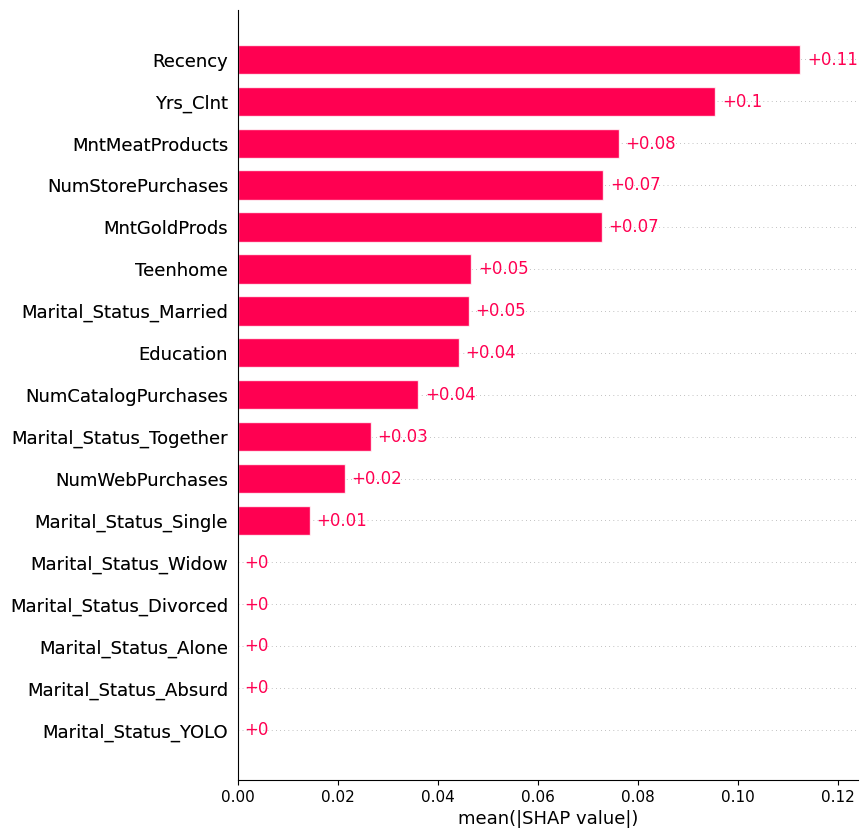

In [80]:
# global level feature importance
# shap.summary_plot(shap_values, X_train_premodel, plot_type='bar')
shap.plots.bar(exps_train, max_display = 50)

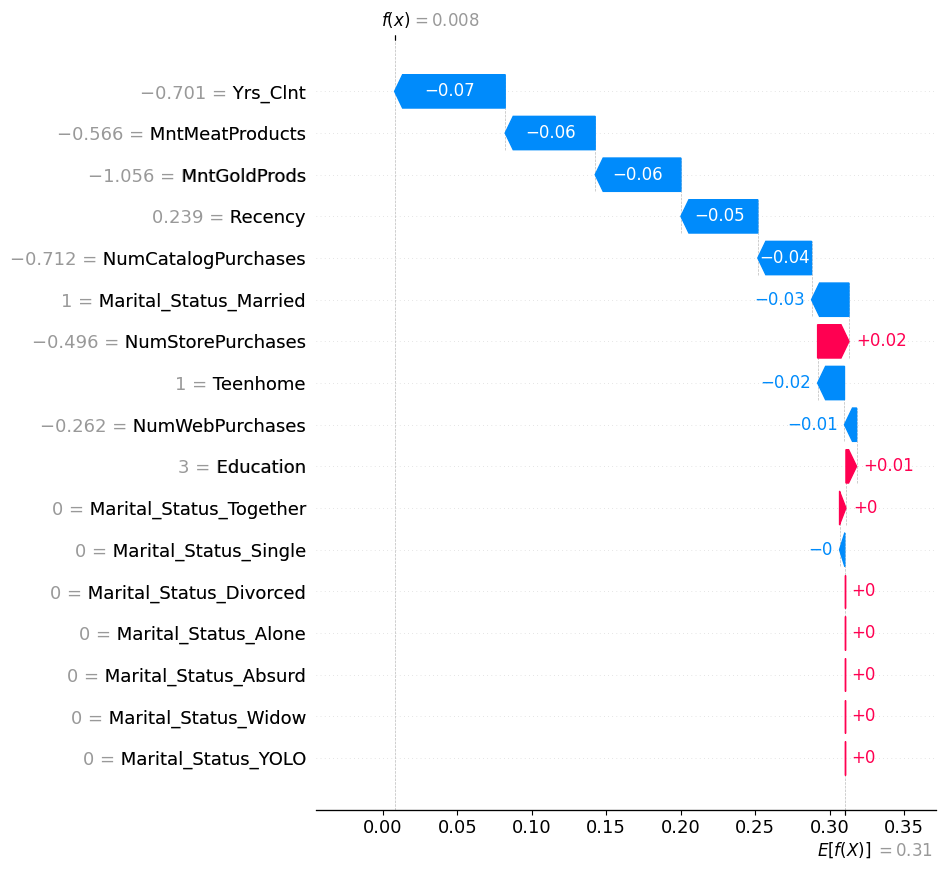

In [81]:

# exp = shap.Explanation(
#     values = shap_values[50],
#     base_values = explainer.expected_value,
#     data = X_train_premodel.iloc[50, :],
# )

# local instance level explanation
shap.plots.waterfall(exps_test[50], max_display=50)

In [82]:
shap.initjs()
shap.plots.force(exps_test[101])

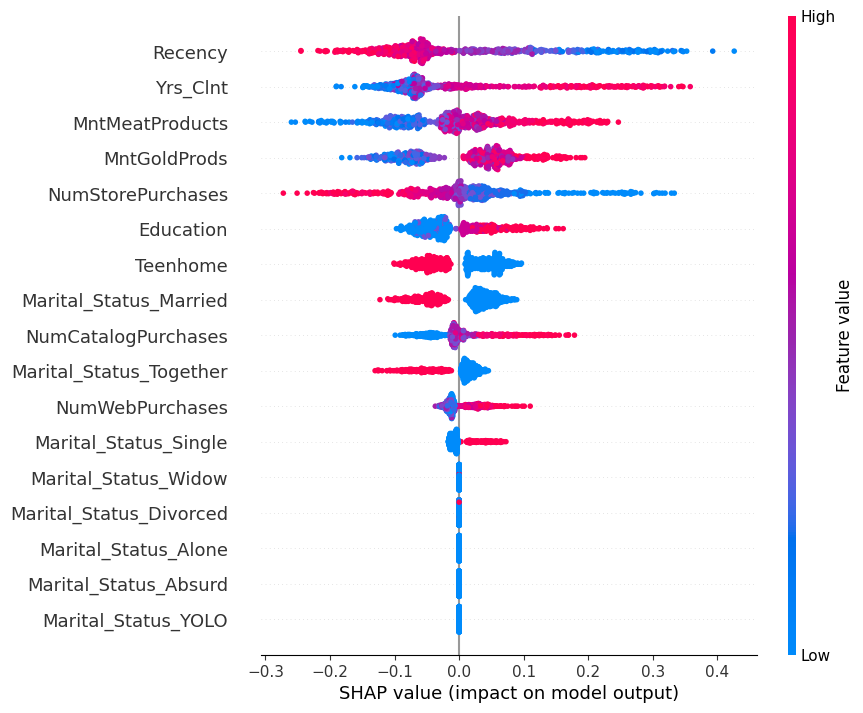

In [83]:
shap.plots.beeswarm(
    exps_test,
    max_display = 22
)